# 데이터 통합 및 전처리

In [2]:
import os
import re
import pandas as pd
from collections import defaultdict

# 폴더 경로
folder = r"C:\Users\doohu\Downloads\시뮬레이션결과-20250510T023338Z-1-001\시뮬레이션결과"

# 시나리오 요소
info_spread_probs = [0.3, 0.6, 0.9]
awareness_ratios = [0.3, 0.6, 0.9]

# 저장용 딕셔너리
trial_counts = defaultdict(list)

# 정규표현식 패턴: 전파확률, 인지비율, trial 번호 추출
pattern = r"대피소정보전파확률_([\d.]+)_대피소인지비율([\d.]+)_trial(\d+)\.xlsx"

# 파일 스캔
for fname in os.listdir(folder):
    if not fname.endswith(".xlsx"):
        continue
    match = re.search(pattern, fname)
    if match:
        prob = float(match.group(1))
        ratio = float(match.group(2))
        trial = int(match.group(3))
        trial_counts[(prob, ratio)].append(trial)

# DataFrame 정리
rows = []
for prob in info_spread_probs:
    for ratio in awareness_ratios:
        key = (prob, ratio)
        trials = sorted(trial_counts.get(key, []))
        rows.append({
            "정보 전파확률": prob,
            "대피소 인지비율": ratio,
            "수행된 Trial 수": len(trials),
            "Trial 번호 목록": trials
        })

df_trial_check = pd.DataFrame(rows)
df_trial_check

,정보 전파확률,대피소 인지비율,수행된 Trial 수,Trial 번호 목록
0,0.3,0.3,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,0.3,0.6,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
2,0.3,0.9,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
3,0.6,0.3,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
4,0.6,0.6,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
5,0.6,0.9,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
6,0.9,0.3,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
7,0.9,0.6,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
8,0.9,0.9,8,"[1, 2, 3, 4, 5, 6, 7, 10]"


In [ ]:
import os
import re
import pandas as pd

# 폴더 경로 지정
folder = r"C:\Users\doohu\Downloads\시뮬레이션결과-20250510T023338Z-1-001\시뮬레이션결과"
pattern = re.compile(r"대피소정보전파확률_([0-9.]+)_대피소인지비율([0-9.]+)_trial(\d+)")
target_column = "tried_to_receive_from"

merged_data = []

for filename in os.listdir(folder):
    if not filename.endswith(".xlsx"):
        continue

    filepath = os.path.join(folder, filename)
    match = pattern.search(filename)
    if not match:
        continue

    info_prob = float(match.group(1))
    awareness_ratio = float(match.group(2))
    trial = int(match.group(3))

    try:
        df = pd.read_excel(filepath)

        if target_column not in df.columns:
            print(f"❌ 건너뜀 (전달기록 없음): {filename}")
            continue  # 해당 열이 없으면 스킵

        # 시나리오 정보 추가
        df["정보 전파확률"] = info_prob
        df["대피소 인지비율"] = awareness_ratio
        df["Trial 번호"] = trial

        merged_data.append(df)
        print(f"✅ 포함: {filename}")
    except Exception as e:
        print(f"⚠️ 실패: {filename} - {e}")

# 병합 및 저장
if merged_data:
    merged_df = pd.concat(merged_data, ignore_index=True)
    output_path = os.path.join(folder, "통합_전달받은자만.xlsx")
    merged_df.to_excel(output_path, index=False)
    print(f"\n📁 저장 완료: {output_path}")
else:
    print("\n❌ 전달받은자 포함된 파일이 없습니다.")

In [ ]:
import os
import re
import pandas as pd

# 폴더 경로 및 타겟 컬럼 설정
folder = r"C:\Users\doohu\Downloads\시뮬레이션결과-20250510T023338Z-1-001\시뮬레이션결과"
pattern = re.compile(r"대피소정보전파확률_([0-9.]+)_대피소인지비율([0-9.]+)_trial(\d+)")
target_column = "tried_to_receive_from"

deleted_files = []

# 파일 탐색 및 삭제
for filename in os.listdir(folder):
    if not filename.endswith(".xlsx"):
        continue

    filepath = os.path.join(folder, filename)
    match = pattern.search(filename)
    if not match:
        continue

    try:
        df = pd.read_excel(filepath, nrows=1)
        if target_column not in df.columns:
            os.remove(filepath)
            deleted_files.append(filename)
            print(f"🗑️ 삭제 완료: {filename}")
    except Exception as e:
        print(f"⚠️ 열기 실패: {filename} - {e}")

print(f"\n✅ 총 삭제된 파일 수: {len(deleted_files)}")

# 전처리 완료 후 분석수행

In [6]:
import os
import pandas as pd
import re
final_df = pd.read_excel(r"C:\Users\doohu\Downloads\시뮬레이션결과-20250510T023338Z-1-001\시뮬레이션결과\통합_전달받은자만.xlsx")

In [7]:
final_df.columns

Index(['position', 'speed', 'behavior', 'type', 'special_area',
       'shelter_knowledge_probability', 'position_float', 'original_speed',
       'path', 'knows_target', 'id', 'goal', 'goal_reached', 'total_distance',
       'real_path', 'path_congest', 'past_congestion', 'past_flood_levels',
       'time_steps', 'current_index', 'time_step_index',
       'tried_to_receive_from', '정보 전파확률', '대피소 인지비율', 'Trial 번호'],
      dtype='object')

In [8]:
len(final_df)

90000

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [10]:
def extract_number(val):
    if isinstance(val, list) and len(val) > 0:
        return val[0]
    elif isinstance(val, str):
        try:
            parsed = eval(val)
            if isinstance(parsed, list) and len(parsed) > 0:
                return float(parsed[0])
        except:
            return None
    elif isinstance(val, (int, float)):
        return val
    return None


In [11]:
print("변환 전 Null 수:", final_df["time_steps"].isnull().sum())
final_df["소요 시간"] = final_df["time_steps"].apply(extract_number)
print("변환 후 Null 수:", final_df["time_steps"].isnull().sum())


변환 전 Null 수: 0
변환 후 Null 수: 0


In [12]:
# ✅ 대피소 인지자 파생
final_df["대피소 인지자"] = final_df["behavior"].apply(
    lambda x: "인지자" if x in ["knows_all", "knows_specific"] else "비인지자"
)

# ✅ 소요 시간 기반 성공 여부 정의 (True if not null)
final_df["소요시간_기준_성공"] = final_df["소요 시간"].notnull()

# ✅ [1] 인지 여부 그룹별 성공률 (소요시간 기준)
group_awareness = final_df.groupby("대피소 인지자")["소요시간_기준_성공"].mean().mul(100).round(2)

# ✅ [2] 보행자 타입별 성공률 (소요시간 기준)
group_type = final_df.groupby("type")["소요시간_기준_성공"].mean().mul(100).round(2)

# ✅ 결과 출력
print("✅ [1] 대피소 인지 여부별 성공률 (소요시간 기준)")
print(group_awareness)
print("\n✅ [2] 보행자 유형별 성공률 (소요시간 기준)")
print(group_type)


✅ [1] 대피소 인지 여부별 성공률 (소요시간 기준)
대피소 인지자
비인지자    90.73
인지자     99.86
Name: 소요시간_기준_성공, dtype: float64

✅ [2] 보행자 유형별 성공률 (소요시간 기준)
type
노인/어린이    96.27
장애인       93.41
중장년       96.27
청소년/청년    96.65
Name: 소요시간_기준_성공, dtype: float64


In [13]:
final_df.columns

Index(['position', 'speed', 'behavior', 'type', 'special_area',
       'shelter_knowledge_probability', 'position_float', 'original_speed',
       'path', 'knows_target', 'id', 'goal', 'goal_reached', 'total_distance',
       'real_path', 'path_congest', 'past_congestion', 'past_flood_levels',
       'time_steps', 'current_index', 'time_step_index',
       'tried_to_receive_from', '정보 전파확률', '대피소 인지비율', 'Trial 번호', '소요 시간',
       '대피소 인지자', '소요시간_기준_성공'],
      dtype='object')

In [14]:
# ✅ 대피소 인지자 파생
final_df["대피소 인지자"] = final_df["behavior"].apply(
    lambda x: "인지자" if x in ["knows_all", "knows_specific"] else "비인지자"
)

# ✅ [1] 인지 여부 그룹별 성공률
group_awareness = final_df.groupby("대피소 인지자")["goal_reached"].mean().mul(100).round(2)

# ✅ [2] 보행자 타입별 성공률
group_type = final_df.groupby("type")["goal_reached"].mean().mul(100).round(2)

# ✅ 결과 출력
print("✅ [1] 대피소 인지 여부별 대피 성공률 (%)")
print(group_awareness)
print("\n✅ [2] 보행자 유형별 대피 성공률 (%)")
print(group_type)


✅ [1] 대피소 인지 여부별 대피 성공률 (%)
대피소 인지자
비인지자    90.73
인지자     99.86
Name: goal_reached, dtype: float64

✅ [2] 보행자 유형별 대피 성공률 (%)
type
노인/어린이    96.27
장애인       93.41
중장년       96.27
청소년/청년    96.65
Name: goal_reached, dtype: float64


In [16]:
final_df.columns

Index(['position', 'speed', 'behavior', 'type', 'special_area',
       'shelter_knowledge_probability', 'position_float', 'original_speed',
       'path', 'knows_target', 'id', 'goal', 'goal_reached', 'total_distance',
       'real_path', 'path_congest', 'past_congestion', 'past_flood_levels',
       'time_steps', 'current_index', 'time_step_index',
       'tried_to_receive_from', '정보 전파확률', '대피소 인지비율', 'Trial 번호', '소요 시간',
       '대피소 인지자', '소요시간_기준_성공'],
      dtype='object')

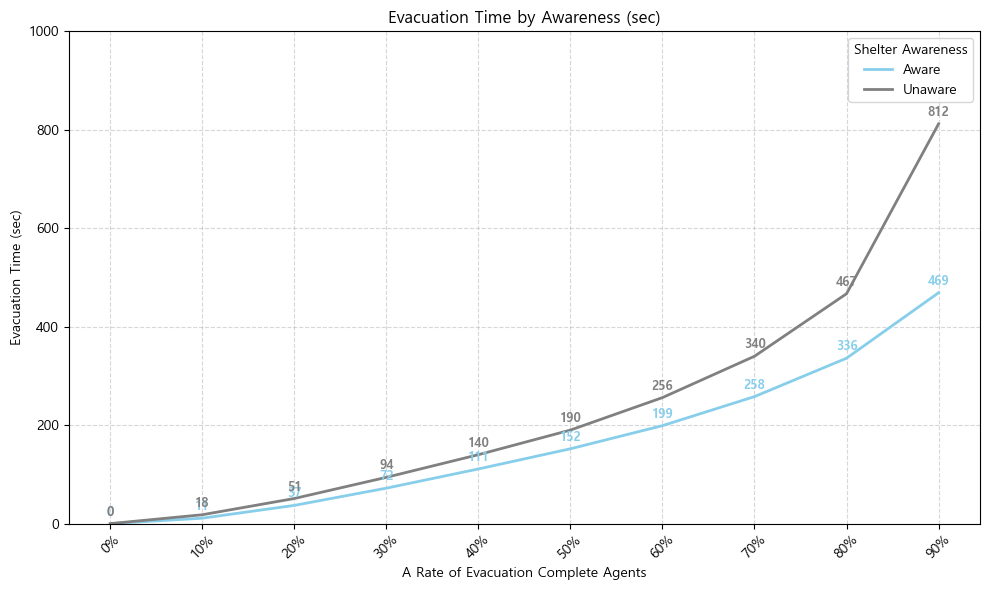

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# ✅ 설정
percentiles = np.arange(0, 100, 10)
labels = [f"{p}%" for p in percentiles]
colors = {"Aware": "skyblue", "Unaware": "gray"}

plt.figure(figsize=(10, 6))
plt.title("Evacuation Time by Awareness (sec)")
plt.xlabel("A Rate of Evacuation Complete Agents")
plt.ylabel("Evacuation Time (sec)")
plt.ylim(0, 1000)

# ✅ behavior 기반 그룹 구분
for group_label, condition in [
    ("Aware", ~final_df["behavior"].isin(["exploratory"])),
    ("Unaware", final_df["behavior"] == "exploratory")
]:
    df = final_df[condition].copy()

    if df.empty:
        continue

    # 실패자 처리
    df["소요 시간 (수정)"] = df.apply(
        lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
        axis=1
    )

    sorted_times = df["소요 시간 (수정)"].dropna().sort_values().values
    total = len(sorted_times)

    percentile_times = []
    for p in percentiles:
        rank = int((p / 100) * total)
        rank = min(rank, total - 1)
        val = sorted_times[rank]
        percentile_times.append(min(val, 1000))  # y축 제한

    # ✅ 선 그리기
    plt.plot(labels, percentile_times,
             label=group_label,
             color=colors[group_label],
             linewidth=2)

    # ✅ 시간값 라벨 표시
    for x, y in zip(labels, percentile_times):
        plt.text(x, y + 10, f"{int(y)}", ha='center', va='bottom',
                 fontsize=9, color=colors[group_label], fontweight='bold')

# ✅ 마무리
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title="Shelter Awareness")
plt.tight_layout()
plt.show()


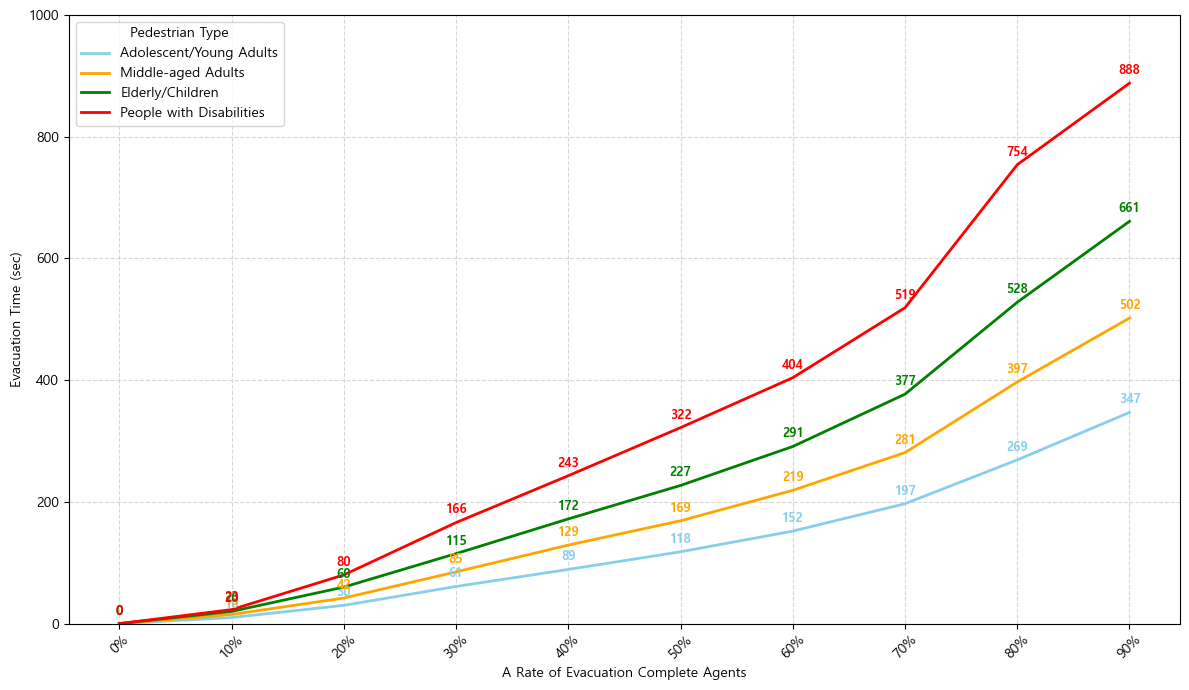

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# ✅ 퍼센트 구간
percentiles = np.arange(0, 100, 10)
labels = [f"{p}%" for p in percentiles]

# ✅ 유형 설정
types = ["청소년/청년", "중장년", "노인/어린이", "장애인"]
type_map = {
    "청소년/청년": "Adolescent/Young Adults",
    "중장년": "Middle-aged Adults",
    "노인/어린이": "Elderly/Children",
    "장애인": "People with Disabilities"
}
colors = {
    "청소년/청년": "skyblue",
    "중장년": "orange",
    "노인/어린이": "green",
    "장애인": "red"
}

plt.figure(figsize=(12, 7))
#plt.title("Evacuation Time by Pedestrian Type (sec)")
plt.xlabel("A Rate of Evacuation Complete Agents")
plt.ylabel("Evacuation Time (sec)")
plt.ylim(0, 1000)

for p_type in types:
    df = final_df[final_df["type"] == p_type].copy()

    if df.empty:
        continue

    # ✅ 실패자 2000초 처리
    df["소요 시간 (수정)"] = df.apply(
        lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
        axis=1
    )

    sorted_times = df["소요 시간 (수정)"].dropna().sort_values().values
    total = len(sorted_times)

    percentile_times = []
    for p in percentiles:
        rank = int((p / 100) * total)
        rank = min(rank, total - 1)
        val = sorted_times[rank]
        percentile_times.append(min(val, 1000))

    # ✅ 영어 라벨로 선 그리기
    eng_label = type_map[p_type]
    plt.plot(labels, percentile_times,
             label=eng_label,
             color=colors[p_type],
             linewidth=2)

    # ✅ 영어 라벨로 시간 수치 표시
    for x, y in zip(labels, percentile_times):
        plt.text(x, y + 10, f"{int(y)}", ha='center', va='bottom',
                 fontsize=9, color=colors[p_type], fontweight='bold')

# ✅ 마무리
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title="Pedestrian Type")
plt.tight_layout()
plt.show()


In [17]:
group_awareness_ratio = final_df.groupby("대피소 인지비율")["goal_reached"].mean().mul(100).round(2)

print("✅ [3] 대피소 인지비율별 대피 성공률 (%)")
print(group_awareness_ratio)


✅ [3] 대피소 인지비율별 대피 성공률 (%)
대피소 인지비율
0.3    92.49
0.6    96.91
0.9    99.23
Name: goal_reached, dtype: float64


In [30]:
group_info_prob = final_df.groupby("대피소 인지비율")["goal_reached"].mean().mul(100).round(2)
print("✅ [4] 정보 전파 확률별 성공률 (소요 시간 기준)")
print(group_info_prob)


✅ [4] 대피소 인지비율 성공률 (소요 시간 기준)
대피소 인지비율
0.3    91.29
0.6    97.03
0.9    99.22
Name: goal_reached, dtype: float64


In [27]:
mean_time_by_info_prob = final_df.groupby("shelter_knowledge_probability")["소요 시간"].mean().round(2)
print("\n⏱️ [2] 정보 전파 확률별 평균 대피 소요시간")
print(mean_time_by_info_prob)


⏱️ [2] 정보 전파 확률별 평균 대피 소요시간
shelter_knowledge_probability
0.3    201.37
0.6    204.13
0.9    205.43
Name: 소요 시간, dtype: float64


In [31]:
mean_time_by_info_prob = final_df.groupby("대피소 인지비율")["소요 시간"].mean().round(2)
print("\n⏱️ [2] 정보 전파 확률별 평균 대피 소요시간")
print(mean_time_by_info_prob)


⏱️ [2] 정보 전파 확률별 평균 대피 소요시간
대피소 인지비율
0.3    216.33
0.6    202.77
0.9    201.91
Name: 소요 시간, dtype: float64


In [32]:
final_df["소요 시간"].mean().round(2)

np.float64(206.88)

In [31]:
import pandas as pd
import numpy as np

# ✅ 시간 구간 설정: 0초부터 1000초까지 100초 단위
time_bins = list(range(0, 1001, 100))  # [0, 100, 200, ..., 1000]
awareness_levels = [0.3, 0.6, 0.9]

# ✅ 결과 저장용 딕셔너리
results = {"Time (sec)": time_bins}

for a_prob in awareness_levels:
    df = final_df[final_df["대피소 인지비율"] == a_prob].copy()

    if df.empty:
        results[f"Aware {a_prob} (%)"] = ["0%" for _ in time_bins]
        continue

    # ✅ 실패자 처리
    df["소요 시간 (수정)"] = df.apply(
        lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
        axis=1
    )

    total = len(df)
    rates = []
    for t in time_bins:
        count = (df["소요 시간 (수정)"] <= t).sum()
        percent = round((count / total) * 100)
        rates.append(f"{percent}%")

    results[f"Aware {a_prob} (%)"] = rates

# ✅ 결과 표로 변환 및 출력
table_df = pd.DataFrame(results)
print("✅ [표] Time-Based Cumulative Evacuation Rate (%)")
display(table_df)


✅ [표] Time-Based Cumulative Evacuation Rate (%)


,Time (sec),Aware 0.3 (%),Aware 0.6 (%),Aware 0.9 (%)
0,0,1%,3%,4%
1,100,33%,35%,37%
2,200,54%,58%,59%
3,300,68%,73%,75%
4,400,77%,83%,85%
5,500,83%,89%,91%
6,600,88%,93%,95%
7,700,90%,95%,97%
8,800,92%,96%,98%
9,900,92%,97%,99%


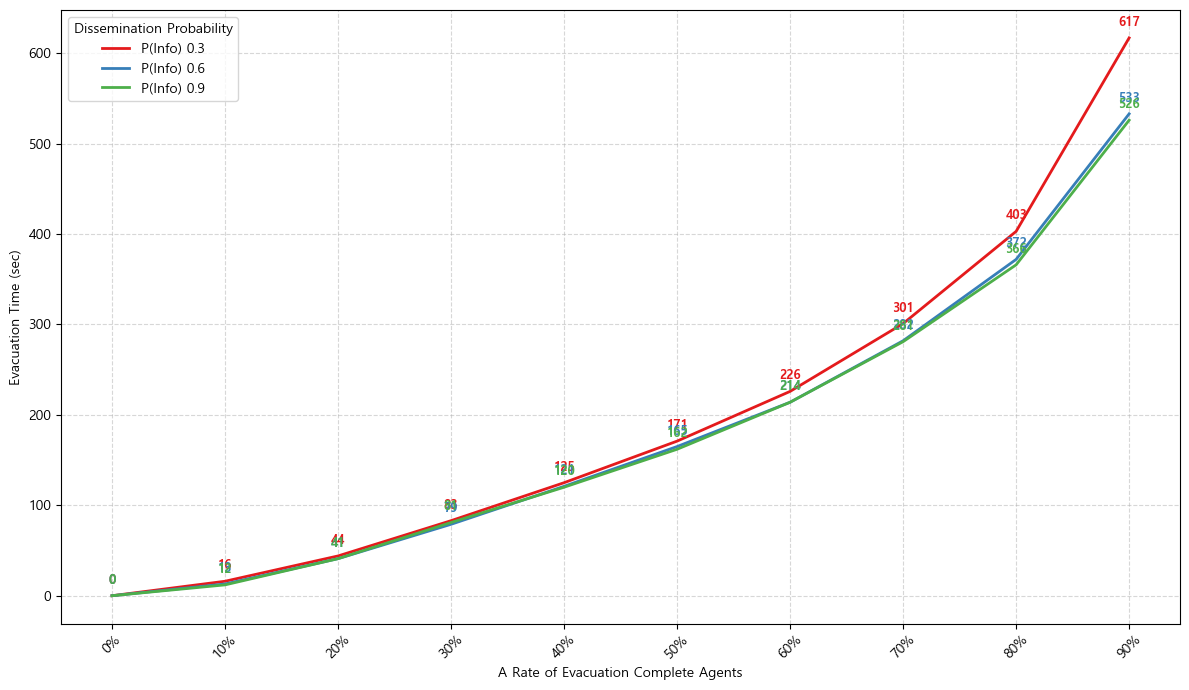

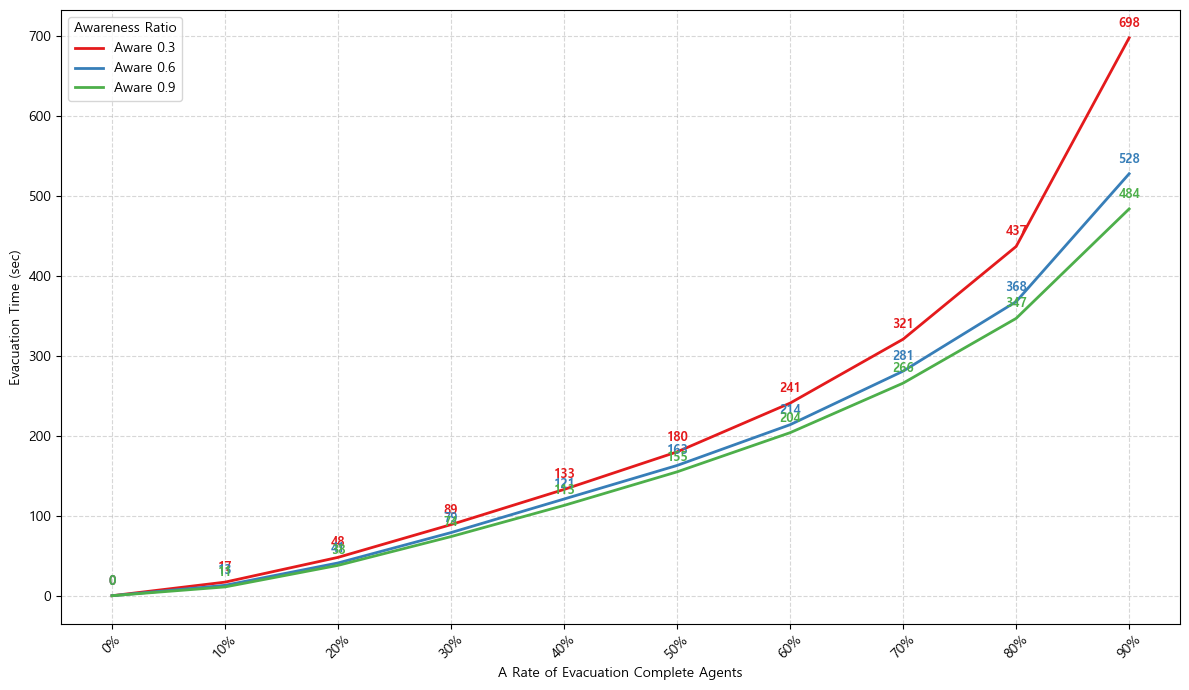

In [30]:
### import matplotlib.pyplot as plt
import numpy as np

# ✅ 퍼센트 구간
percentiles = np.arange(0, 100, 10)
labels = [f"{p}%" for p in percentiles]

# ✅ 설정
knowledge_levels = [0.3, 0.6, 0.9]
awareness_levels = [0.3, 0.6, 0.9]
fixed_awareness = 0.6
fixed_knowledge = 0.6
colors = {
    0.3: "#e41a1c",   # Red
    0.6: "#377eb8",   # Blue
    0.9: "#4daf4a"    # Green
}
def get_y_offset(val):
    if val < 100:
        return 15
    elif val < 300:
        return 20
    elif val < 500:
        return 25
    else:
        return 30
        
# ✅ [1] Dissemination 비교 (Awareness 고정)
plt.figure(figsize=(12, 7))
#plt.title(f"Evacuation Time by Dissemination Probability (Aware={fixed_awareness})")
plt.xlabel("A Rate of Evacuation Complete Agents")
plt.ylabel("Evacuation Time (sec)")
#plt.ylim(0, 1000)

for k_prob in knowledge_levels:
    df = final_df[
        (final_df["정보 전파확률"] == k_prob)
    ].copy()

    if df.empty:
        continue

    df["소요 시간 (수정)"] = df.apply(
        lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
        axis=1
    )

    times = df["소요 시간 (수정)"].dropna().sort_values().values
    total = len(times)
    percentile_times = [min(times[int((p / 100) * total)], 1000) for p in percentiles]

    color = colors[k_prob]
    plt.plot(labels, percentile_times, label=f"P(Info) {k_prob}", color=color, linewidth=2)

    for x, y in zip(labels, percentile_times):
        plt.text(x, y + 10, f"{int(y)}", ha='center', va='bottom', fontsize=9, color=color, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title="Dissemination Probability")
plt.tight_layout()
plt.show()

# ✅ [2] Awareness 비교 (Dissemination 고정)
plt.figure(figsize=(12, 7))
#plt.title(f"Evacuation Time by Awareness Ratio (P(Info)={fixed_knowledge})")
plt.xlabel("A Rate of Evacuation Complete Agents")
plt.ylabel("Evacuation Time (sec)")
#plt.ylim(0, 1000)

for a_prob in awareness_levels:
    df = final_df[
        (final_df["대피소 인지비율"] == a_prob)
    ].copy()

    if df.empty:
        continue

    df["소요 시간 (수정)"] = df.apply(
        lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
        axis=1
    )

    times = df["소요 시간 (수정)"].dropna().sort_values().values
    total = len(times)
    percentile_times = [min(times[int((p / 100) * total)], 1000) for p in percentiles]

    color = colors[a_prob]
    plt.plot(labels, percentile_times, label=f"Aware {a_prob}", color=color, linewidth=2)

    for x, y in zip(labels, percentile_times):
        plt.text(x, y + 10, f"{int(y)}", ha='center', va='bottom', fontsize=9, color=color, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title="Awareness Ratio")
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import numpy as np

# ✅ 시간 구간 설정: 0초부터 1000초까지 100초 단위
time_bins = list(range(0, 1001, 100))  # [0, 100, ..., 1000]
knowledge_levels = [0.3, 0.6, 0.9]

# ✅ 결과 저장용 딕셔너리
results = {"Time (sec)": time_bins}

for k_prob in knowledge_levels:
    df = final_df[final_df["정보 전파확률"] == k_prob].copy()

    if df.empty:
        results[f"P(Info) {k_prob} (%)"] = ["0%" for _ in time_bins]
        continue

    # ✅ 실패자 처리
    df["소요 시간 (수정)"] = df.apply(
        lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
        axis=1
    )

    total = len(df)
    rates = []
    for t in time_bins:
        count = (df["소요 시간 (수정)"] <= t).sum()
        percent = round((count / total) * 100)
        rates.append(f"{percent}%")

    results[f"P(Info) {k_prob} (%)"] = rates

# ✅ 결과 표로 변환 및 출력
table_df = pd.DataFrame(results)
print("✅ [표] Time-Based Cumulative Evacuation Rate by Dissemination Probability (%)")
display(table_df)


✅ [표] Time-Based Cumulative Evacuation Rate by Dissemination Probability (%)


,Time (sec),P(Info) 0.3 (%),P(Info) 0.6 (%),P(Info) 0.9 (%)
0,0,2%,3%,3%
1,100,34%,35%,35%
2,200,56%,58%,57%
3,300,70%,73%,73%
4,400,80%,83%,83%
5,500,86%,89%,89%
6,600,90%,93%,93%
7,700,92%,95%,95%
8,800,93%,96%,97%
9,900,94%,97%,97%


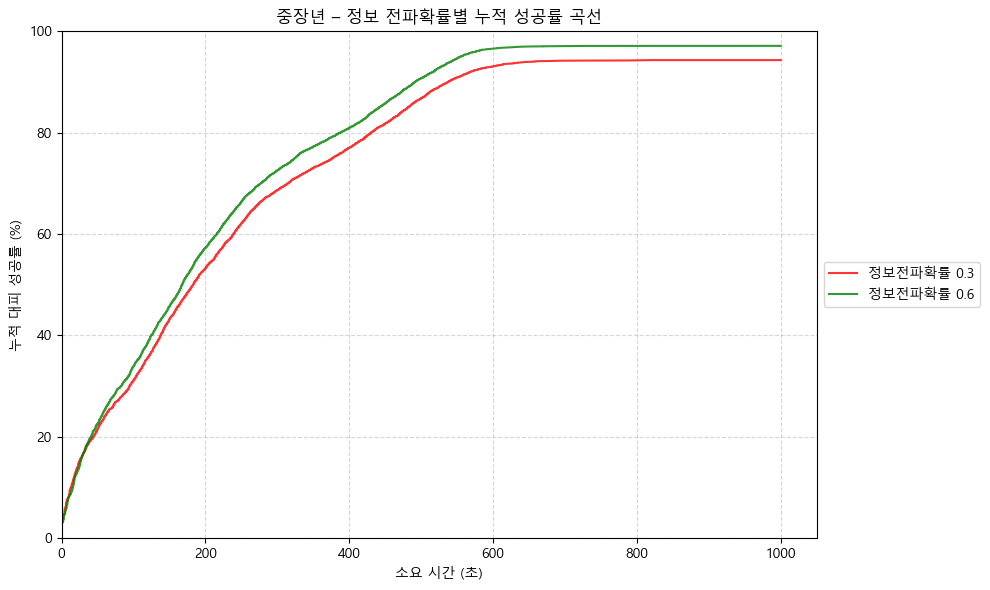

📊 누적 성공률 표 – 중장년


,구간 (초),인지비율 0.3,인지비율 0.6,인지비율 0.9
0,0~20,13.09,12.49,0
1,20~40,19.18,19.72,0
2,40~60,23.94,25.20,0
3,60~80,27.32,29.61,0
4,80~100,30.98,33.85,0
5,100~120,35.56,38.52,0
6,120~140,40.55,43.44,0
7,140~160,45.20,47.76,0
8,160~180,49.33,52.97,0
9,180~200,53.15,57.26,0


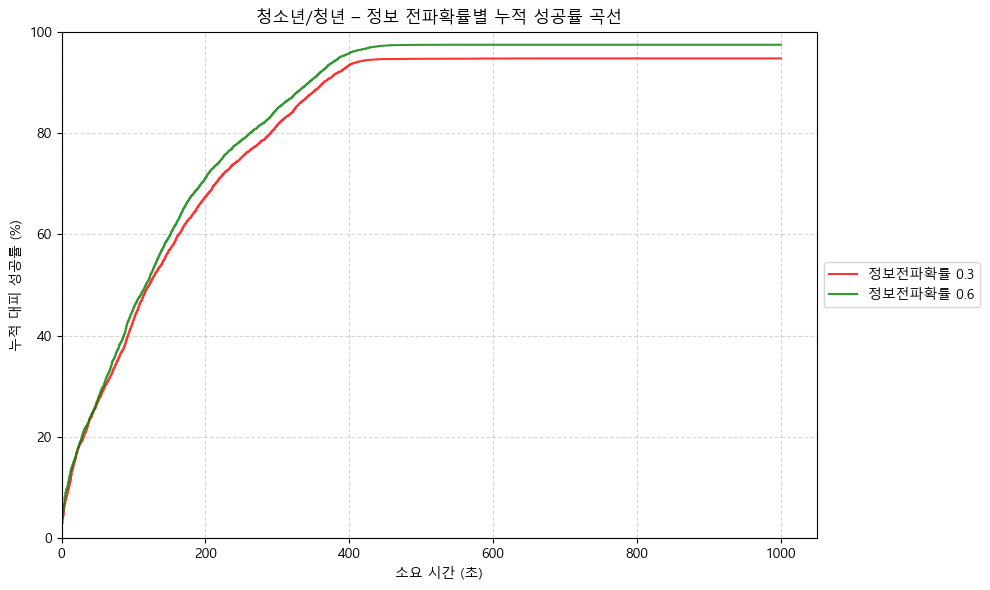

📊 누적 성공률 표 – 청소년/청년


,구간 (초),인지비율 0.3,인지비율 0.6,인지비율 0.9
0,0~20,15.85,16.13,0
1,20~40,23.55,23.79,0
2,40~60,29.75,30.55,0
3,60~80,35.64,37.71,0
4,80~100,42.91,45.17,0
5,100~120,49.50,50.63,0
6,120~140,54.21,56.90,0
7,140~160,59.17,62.14,0
8,160~180,63.35,67.39,0
9,180~200,67.28,71.01,0


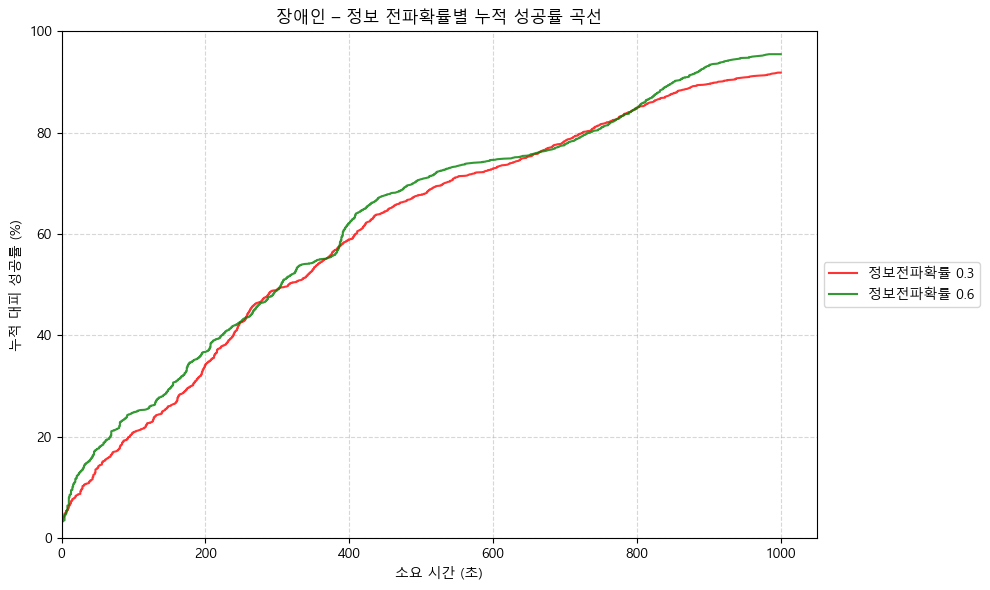

📊 누적 성공률 표 – 장애인


,구간 (초),인지비율 0.3,인지비율 0.6,인지비율 0.9
0,0~20,8.28,11.70,0
1,20~40,11.15,15.41,0
2,40~60,15.22,18.89,0
3,60~80,17.49,21.69,0
4,80~100,20.76,24.75,0
5,100~120,22.70,25.50,0
6,120~140,24.77,27.97,0
7,140~160,26.84,30.97,0
8,160~180,29.97,34.68,0
9,180~200,34.05,36.71,0


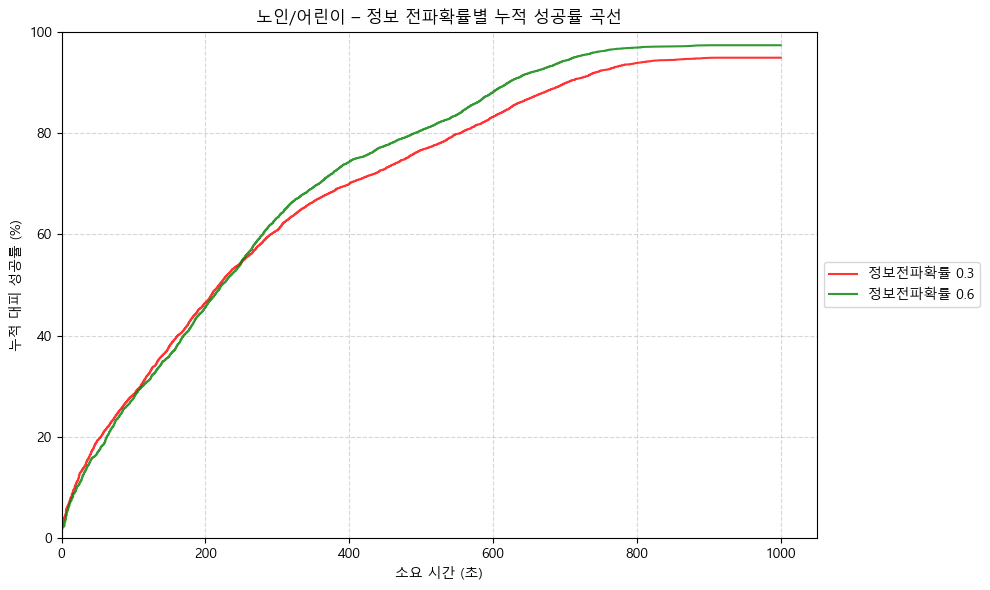

📊 누적 성공률 표 – 노인/어린이


,구간 (초),인지비율 0.3,인지비율 0.6,인지비율 0.9
0,0~20,10.56,9.34,0
1,20~40,16.42,15.06,0
2,40~60,21.14,18.78,0
3,60~80,24.98,23.90,0
4,80~100,28.30,27.54,0
5,100~120,32.16,30.95,0
6,120~140,35.97,34.62,0
7,140~160,39.67,37.72,0
8,160~180,43.10,41.63,0
9,180~200,46.39,45.54,0


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ✅ 유형별 시각화 반복
for ped_type in pedestrian_types:
    plt.figure(figsize=(10, 6))
    plt.title(f"{ped_type} – 정보 전파확률별 누적 성공률 곡선")

    summary = {"구간 (초)": [f"{int(start)}~{int(start + bin_width)}" for start in bins[:-1]]}

    for know_prob in knowledge_levels:
        df = final_df[
            (final_df["shelter_knowledge_probability"] == know_prob) &
            (final_df["type"] == ped_type)
        ].copy()

        total = len(df)
        if total == 0:
            summary[f"인지비율 {know_prob}"] = [0] * len(bins[:-1])
            continue

        # ✅ 실패자 소요 시간 대체
        df["소요 시간 (수정)"] = df.apply(
            lambda row: row["소요 시간"] if row["goal_reached"] else 10000,
            axis=1
        )

        # ✅ 누적 성공률 계산
        success_times = df["소요 시간 (수정)"].sort_values()
        cum_success_rate = [(i + 1) / total * 100 for i in range(len(success_times))]
        
        # ✅ 1000초 미만까지 표시
        mask = success_times < 1000
        display_times = success_times[mask]
        display_rates = np.array(cum_success_rate)[mask]
        
        # ✅ 선 끊김 방지: 마지막 점을 그대로 1000까지 이어붙임
        if len(display_times) > 0 and display_times.values[-1] < 1000:
            display_times = np.append(display_times, 1000)
            display_rates = np.append(display_rates, display_rates[-1])


        plt.plot(display_times, display_rates,
                 label=f"정보전파확률 {know_prob}",
                 color=colors.get(know_prob, "gray"),
                 linewidth=1.5,
                 alpha=0.8)

        # ✅ 누적 성공률 표 생성
        counts, _ = np.histogram(success_times, bins=bins)
        cumulative = np.cumsum(counts)
        cumulative_rate = (cumulative / total) * 100
        summary[f"인지비율 {know_prob}"] = [round(val, 2) for val in cumulative_rate]

    # ✅ Plot 스타일 마무리
    plt.xlabel("소요 시간 (초)")
    plt.ylabel("누적 대피 성공률 (%)")
    plt.xlim(left=0)
    plt.ylim(0, 100)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

    # ✅ 표 출력 및 저장
    summary_df = pd.DataFrame(summary)
    all_summary_tables[ped_type] = summary_df
    print(f"📊 누적 성공률 표 – {ped_type}")
    display(summary_df)


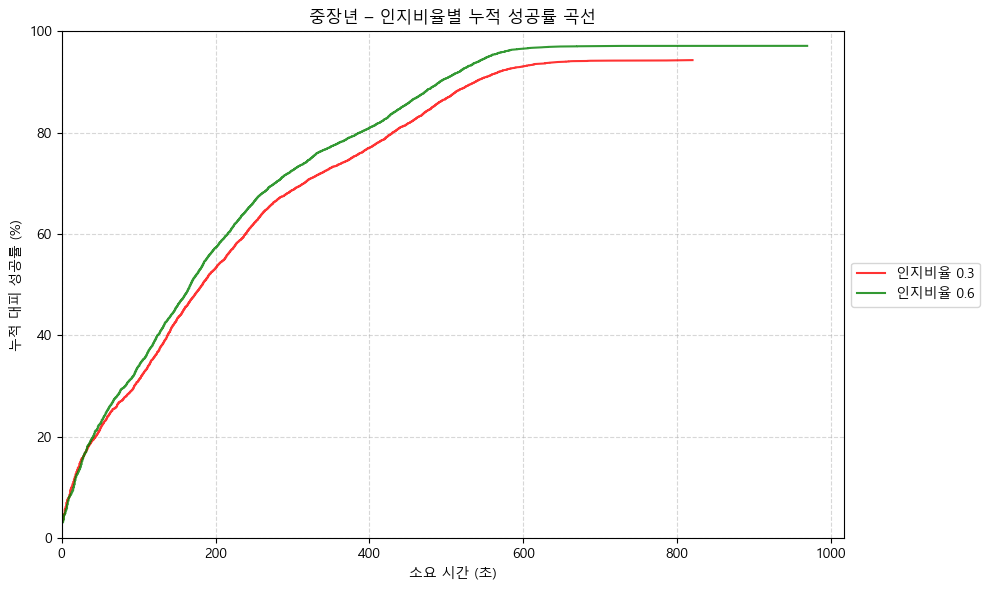

📊 누적 성공률 표 – 중장년


,구간 (초),인지비율 0.3,인지비율 0.6,인지비율 0.9
0,0~20,13.09,12.49,0
1,20~40,19.18,19.72,0
2,40~60,23.94,25.20,0
3,60~80,27.32,29.61,0
4,80~100,30.98,33.85,0
5,100~120,35.56,38.52,0
6,120~140,40.55,43.44,0
7,140~160,45.20,47.76,0
8,160~180,49.33,52.97,0
9,180~200,53.15,57.26,0


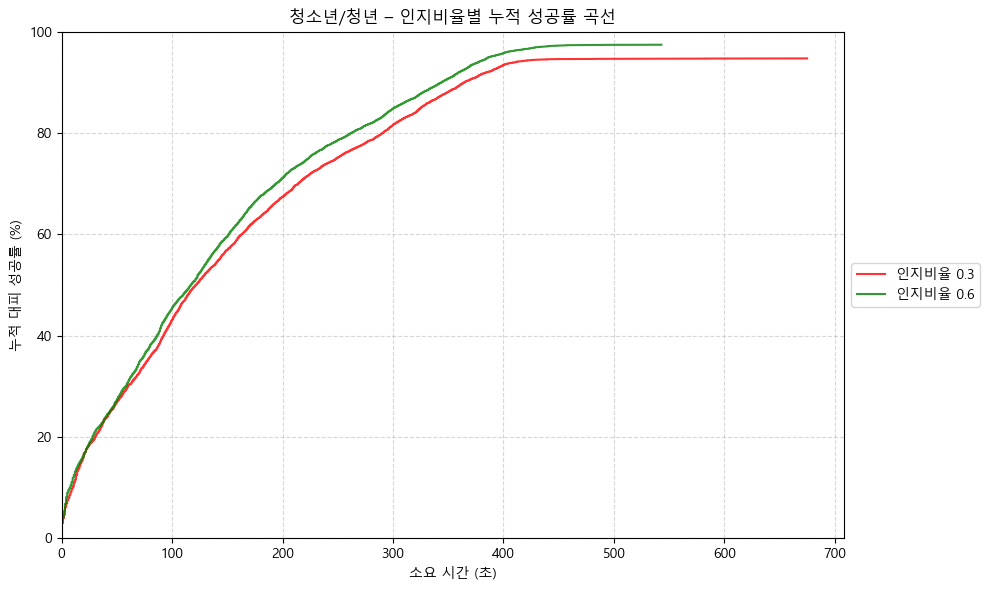

📊 누적 성공률 표 – 청소년/청년


,구간 (초),인지비율 0.3,인지비율 0.6,인지비율 0.9
0,0~20,15.85,16.13,0
1,20~40,23.55,23.79,0
2,40~60,29.75,30.55,0
3,60~80,35.64,37.71,0
4,80~100,42.91,45.17,0
5,100~120,49.50,50.63,0
6,120~140,54.21,56.90,0
7,140~160,59.17,62.14,0
8,160~180,63.35,67.39,0
9,180~200,67.28,71.01,0


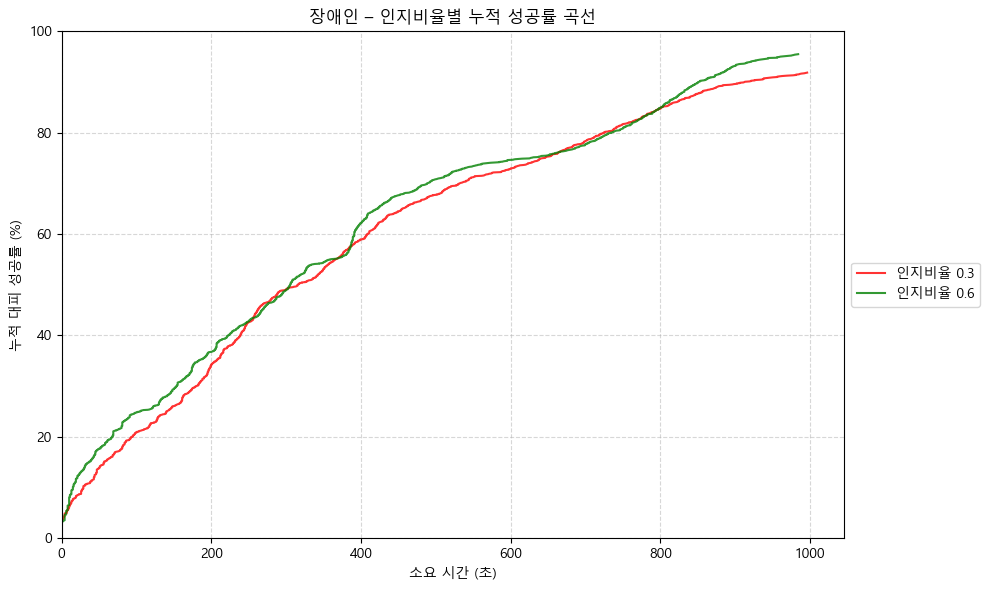

📊 누적 성공률 표 – 장애인


,구간 (초),인지비율 0.3,인지비율 0.6,인지비율 0.9
0,0~20,8.28,11.70,0
1,20~40,11.15,15.41,0
2,40~60,15.22,18.89,0
3,60~80,17.49,21.69,0
4,80~100,20.76,24.75,0
5,100~120,22.70,25.50,0
6,120~140,24.77,27.97,0
7,140~160,26.84,30.97,0
8,160~180,29.97,34.68,0
9,180~200,34.05,36.71,0


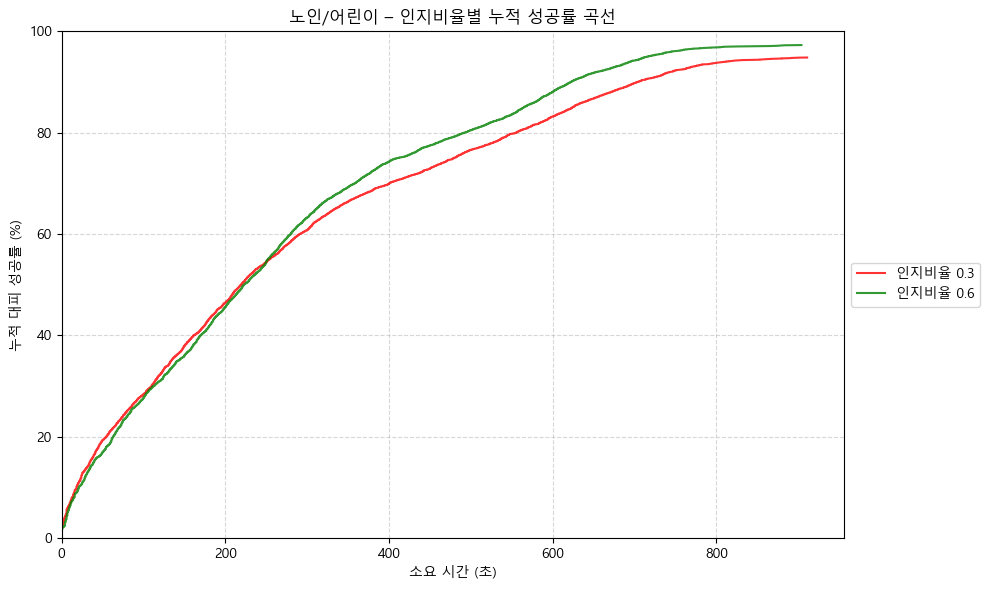

📊 누적 성공률 표 – 노인/어린이


,구간 (초),인지비율 0.3,인지비율 0.6,인지비율 0.9
0,0~20,10.56,9.34,0
1,20~40,16.42,15.06,0
2,40~60,21.14,18.78,0
3,60~80,24.98,23.90,0
4,80~100,28.30,27.54,0
5,100~120,32.16,30.95,0
6,120~140,35.97,34.62,0
7,140~160,39.67,37.72,0
8,160~180,43.10,41.63,0
9,180~200,46.39,45.54,0


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ 히스토그램 bin 설정
bin_width = 20
max_time = final_df["소요 시간"].dropna().max()
bins = np.arange(0, max_time + bin_width, bin_width)

# ✅ 파라미터 설정
knowledge_levels = [0.3, 0.6, 0.9]
pedestrian_types = ["중장년", "청소년/청년", "장애인", "노인/어린이"]
colors = {0.3: "red", 0.6: "green", 0.9: "blue"}

# ✅ 전체 summary 저장용
all_summary_tables = {}

# ✅ 시각화
for ped_type in pedestrian_types:
    plt.figure(figsize=(10, 6))
    plt.title(f"{ped_type} – 인지비율별 누적 성공률 곡선")

    all_rates = []
    summary = {"구간 (초)": [f"{int(start)}~{int(start + bin_width)}" for start in bins[:-1]]}

    for know_prob in knowledge_levels:
        df = final_df[
            (final_df["shelter_knowledge_probability"] == know_prob) &
            (final_df["type"] == ped_type)
        ]
        total = len(df)
        if total == 0:
            summary[f"인지비율 {know_prob}"] = [0] * len(bins[:-1])
            continue

        success_times = df.loc[df["goal_reached"] == True, "소요 시간"].dropna().sort_values()
        if len(success_times) == 0:
            summary[f"인지비율 {know_prob}"] = [0] * len(bins[:-1])
            continue

        # ✅ 누적 성공률 계산
        cum_success_rate = [(i + 1) / total * 100 for i in range(len(success_times))]
        all_rates.extend(cum_success_rate)

        plt.plot(success_times.values, cum_success_rate,
                 label=f"인지비율 {know_prob}",
                 color=colors[know_prob],
                 linewidth=1.5,
                 alpha=0.8)

        # ✅ 히스토그램 기반 누적 성공률 (표)
        counts, _ = np.histogram(success_times, bins=bins)
        cumulative = np.cumsum(counts)
        cumulative_rate = (cumulative / total) * 100
        summary[f"인지비율 {know_prob}"] = [round(val, 2) for val in cumulative_rate]

    plt.xlabel("소요 시간 (초)")
    plt.ylabel("누적 대피 성공률 (%)")
    plt.xlim(left=0)
    if all_rates:
        min_rate = max(min(all_rates) - 5, 0)
        max_rate = min(max(all_rates) + 5, 100)
        plt.ylim(min_rate, max_rate)
    else:
        plt.ylim(0, 100)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

    # ✅ 표 저장 및 출력
    summary_df = pd.DataFrame(summary)
    all_summary_tables[ped_type] = summary_df
    print(f"📊 누적 성공률 표 – {ped_type}")
    display(summary_df)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document
from docx.shared import Inches
import os

# 가정된 변수 (실행 환경 상 여기서는 정의만 해둠)
pedestrian_types = ["중장년", "청소년/청년", "장애인", "노인/어린이"]
knowledge_levels = [0.3, 0.6, 0.9]
info_probs = [0.3, 0.6, 0.9]
colors = {0.3: "red", 0.6: "green", 0.9: "blue"}

# 폴더 생성
os.makedirs("plots", exist_ok=True)
os.makedirs("summaries", exist_ok=True)

# Word 문서 생성
doc = Document()
doc.add_heading("보행자 유형별 대피 성공률 및 소요시간 분석", level=1)

# 분석 기준별 설정
analysis_cases = [
    {"column": "대피소 인지비율", "label": "인지비율", "values": knowledge_levels},
    {"column": "정보 전파확률", "label": "정보 전파확률", "values": info_probs}
]

# ✅ 누적 성공률 곡선 + 누적표
bin_width = 30
max_time = final_df["소요 시간"].dropna().max()
bins = np.arange(0, max_time + bin_width, bin_width)

for case in analysis_cases:
    col, label, values = case["column"], case["label"], case["values"]
    doc.add_heading(f"누적 성공률 분석 – {label}", level=1)

    for ped_type in pedestrian_types:
        plt.figure(figsize=(10, 6))
        plt.title(f"{ped_type} – {label}별 대피 성공률 비교")
        all_rates = []
        summary = {"구간 (초)": [f"{int(start)}~{int(start+bin_width)}" for start in bins[:-1]]}

        for val in values:
            df = final_df[
                (final_df[col] == val) &
                (final_df["보행자 타입"] == ped_type)
            ]
            total = len(df)
            if total == 0:
                summary[f"{label} {val}"] = [0] * len(bins[:-1])
                continue

            success_times = df.loc[df["소요 시간"].notnull(), "소요 시간"].sort_values()
            if len(success_times) == 0:
                summary[f"{label} {val}"] = [0] * len(bins[:-1])
                continue

            cum_success_rate = [(i + 1) / total * 100 for i in range(len(success_times))]
            all_rates.extend(cum_success_rate)

            plt.plot(success_times.values, cum_success_rate,
                     label=f"{label} {val}",
                     color=colors[val],
                     linewidth=1.5,
                     alpha=0.8)

            counts, _ = np.histogram(success_times, bins=bins)
            cumulative = np.cumsum(counts)
            cumulative_rate = (cumulative / total) * 100
            summary[f"{label} {val}"] = [round(val, 2) for val in cumulative_rate]

        plt.xlabel("소요 시간 (초)")
        plt.ylabel("누적 대피 성공률 (%)")
        plt.xlim(left=0)
        if all_rates:
            plt.ylim(max(min(all_rates) - 5, 0), min(max(all_rates) + 5, 100))
        else:
            plt.ylim(0, 100)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout()

        ped_type_safe = ped_type.replace("/", "_")
        fig_path = f"plots/{ped_type_safe}_{label}_cum_graph.png"
        plt.savefig(fig_path, dpi=300)
        plt.close()

        doc.add_heading(f"{ped_type} – 누적 성공률 그래프 ({label})", level=2)
        doc.add_picture(fig_path, width=Inches(6.0))

        # 표 삽입
        summary_df = pd.DataFrame(summary)
        doc.add_heading(f"{ped_type} – 누적 성공률 표 ({label})", level=2)
        table = doc.add_table(rows=1, cols=len(summary_df.columns))
        table.style = 'Table Grid'
        hdr_cells = table.rows[0].cells
        for i, colname in enumerate(summary_df.columns):
            hdr_cells[i].text = str(colname)
        for _, row in summary_df.iterrows():
            row_cells = table.add_row().cells
            for i, item in enumerate(row):
                row_cells[i].text = str(item)

# ✅ Boxplot – 인지비율 및 정보 전파확률 기준 소요시간
doc.add_page_break()
doc.add_heading("보행자 유형별 Boxplot – 대피 소요시간 분포", level=1)

for case in analysis_cases:
    col, label, values = case["column"], case["label"], case["values"]
    doc.add_heading(f"Boxplot 분석 – {label}", level=1)

    for ped_type in pedestrian_types:
        subset = final_df[
            (final_df["보행자 타입"] == ped_type) &
            (final_df["소요 시간"].notnull())
        ]
        if subset.empty:
            continue

        plt.figure(figsize=(8, 6))
        sns.boxplot(x=col, y="소요 시간", data=subset, palette="Set2")

        group_means = subset.groupby(col)["소요 시간"].mean()
        for i, xval in enumerate(sorted(group_means.index)):
            mean_time = round(group_means[xval], 1)
            plt.text(i, mean_time + 5, f"평균: {mean_time}", ha='center', color='black', fontsize=9)

        plt.title(f"{ped_type} – {label}별 대피 소요시간 (Boxplot)")
        plt.xlabel(label)
        plt.ylabel("소요 시간 (초)")
        plt.ylim(bottom=0)
        plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()

        fig_path = f"plots/{ped_type.replace('/', '_')}_{label}_boxplot.png"
        plt.savefig(fig_path, dpi=300)
        plt.close()

        doc.add_heading(f"{ped_type} – {label} 기준 Boxplot", level=2)
        doc.add_paragraph(f"{label}별 대피 소요시간 분포")
        doc.add_picture(fig_path, width=Inches(6.0))

# ✅ 최종 문서 저장
doc_path = "summaries/대피_성공률_및_소요시간_분석.docx"
doc.save(doc_path)
doc_path


C:\Users\doohu\AppData\Local\Temp\ipykernel_32004\1897621686.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="소요 시간", data=subset, palette="Set2")
C:\Users\doohu\AppData\Local\Temp\ipykernel_32004\1897621686.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="소요 시간", data=subset, palette="Set2")
C:\Users\doohu\AppData\Local\Temp\ipykernel_32004\1897621686.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="소요 시간", data=subset, palette="Set2")
C:\Users\doohu\AppData\Local\Temp\ipykernel_32004\1897621686.

'summaries/대피_성공률_및_소요시간_분석.docx'

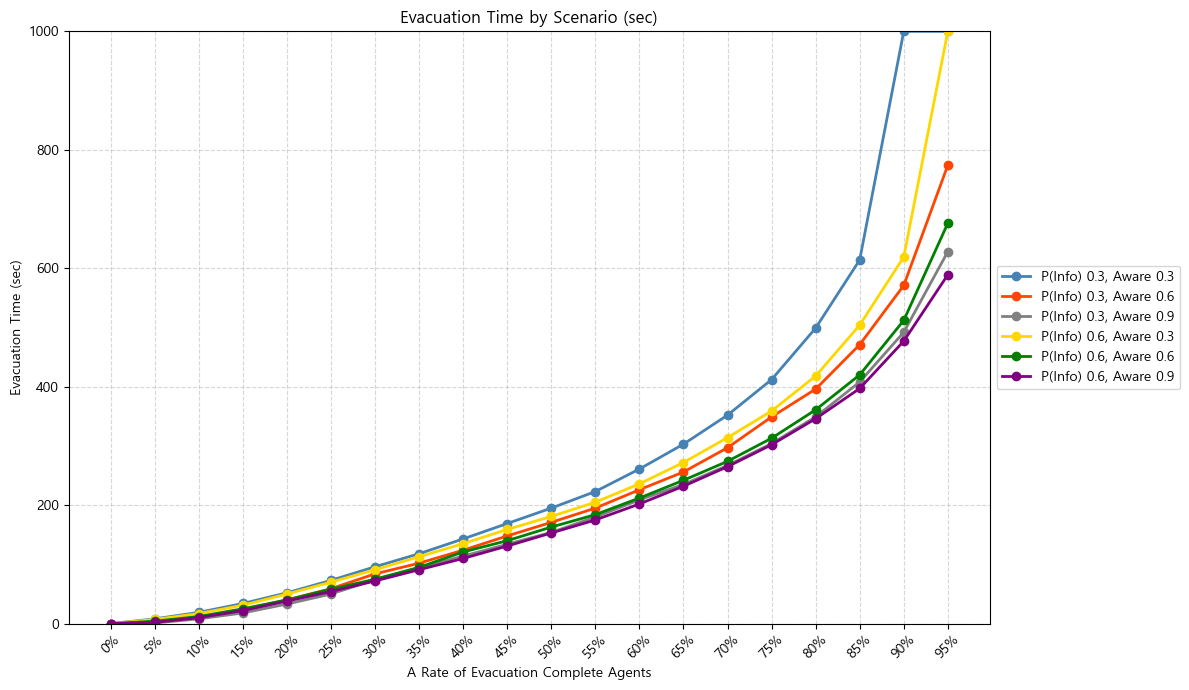

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ 5% 단위 퍼센트 구간 설정
percentiles = np.arange(0, 100, 5)  # 0%, 5%, ..., 95%
labels = [f"{p}%" for p in percentiles]

# ✅ 시나리오 조합
knowledge_levels = [0.3, 0.6, 0.9]
awareness_levels = [0.3, 0.6, 0.9]
colors = ["steelblue", "orangered", "gray", "gold", "green", "purple", "brown", "olive", "teal"]

plt.figure(figsize=(12, 7))
plt.title("Evacuation Time by Scenario (sec)")
plt.xlabel("A Rate of Evacuation Complete Agents")
plt.ylabel("Evacuation Time (sec)")
plt.ylim(0, 1000)

for idx, (k_prob, a_prob) in enumerate([(k, a) for k in knowledge_levels for a in awareness_levels]):
    scenario_df = final_df[
        (final_df["정보 전파확률"] == k_prob) &
        (final_df["대피소 인지비율"] == a_prob)
    ].copy()

    if scenario_df.empty:
        continue

    # ✅ 실패자 소요 시간 2000초로 대체 (완화)
    scenario_df["소요 시간 (수정)"] = scenario_df.apply(
        lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
        axis=1
    )

    times = scenario_df["소요 시간 (수정)"].dropna().sort_values().values
    total = len(times)

    percentile_times = []
    for p in percentiles:
        rank = int((p / 100) * total)
        rank = min(rank, total - 1)
        percentile_value = times[rank]
        percentile_times.append(min(percentile_value, 1000))  # ✅ Y축 제한

    label = f"P(Info) {k_prob}, Aware {a_prob}"
    plt.plot(labels, percentile_times,
             label=label,
             color=colors[idx % len(colors)],
             marker='o', linewidth=2)

# ✅ 그래프 마무리
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


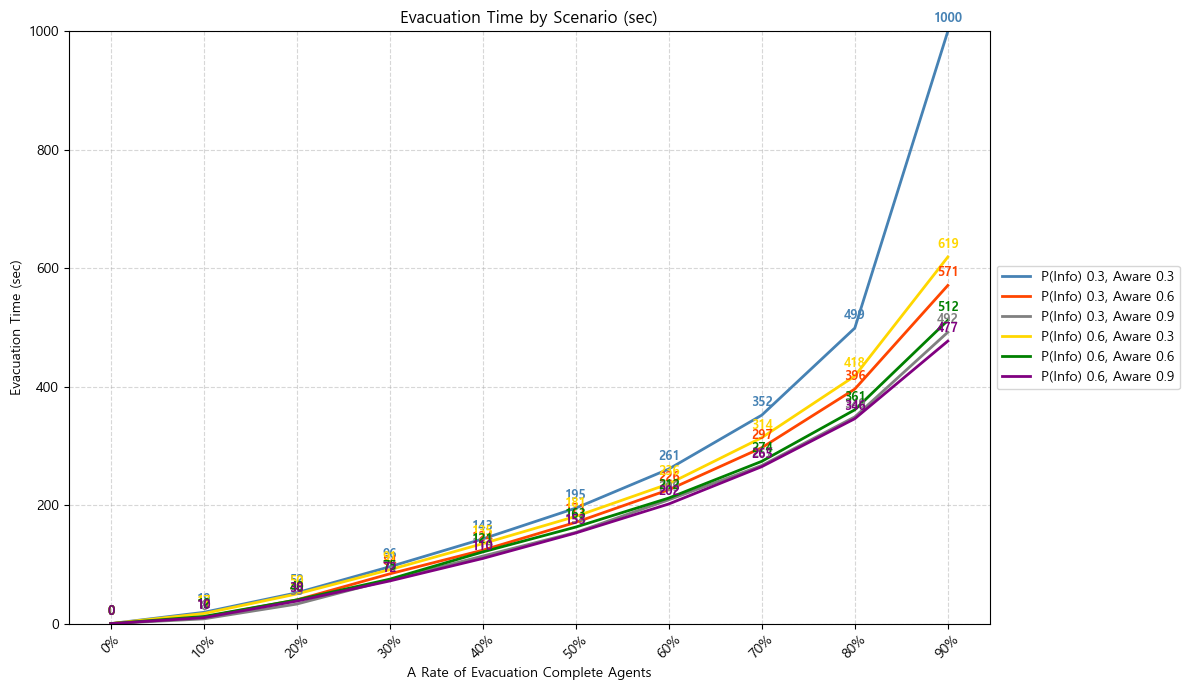

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ 10% 단위 퍼센트 구간
percentiles = np.arange(0, 100, 10)
labels = [f"{p}%" for p in percentiles]

# ✅ 시나리오 조합
knowledge_levels = [0.3, 0.6, 0.9]
awareness_levels = [0.3, 0.6, 0.9]
colors = ["steelblue", "orangered", "gray", "gold", "green", "purple", "brown", "olive", "teal"]

plt.figure(figsize=(12, 7))
plt.title("Evacuation Time by Scenario (sec)")
plt.xlabel("A Rate of Evacuation Complete Agents")
plt.ylabel("Evacuation Time (sec)")
plt.ylim(0, 1000)

for idx, (k_prob, a_prob) in enumerate([(k, a) for k in knowledge_levels for a in awareness_levels]):
    scenario_df = final_df[
        (final_df["정보 전파확률"] == k_prob) &
        (final_df["대피소 인지비율"] == a_prob)
    ].copy()

    if scenario_df.empty:
        continue

    # ✅ 실패자 소요 시간 대체
    scenario_df["소요 시간 (수정)"] = scenario_df.apply(
        lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
        axis=1
    )

    times = scenario_df["소요 시간 (수정)"].dropna().sort_values().values
    total = len(times)

    percentile_times = []
    for p in percentiles:
        rank = int((p / 100) * total)
        rank = min(rank, total - 1)
        val = times[rank]
        percentile_times.append(min(val, 1000))  # 제한

    label = f"P(Info) {k_prob}, Aware {a_prob}"
    color = colors[idx % len(colors)]

    # ✅ 선 먼저 그림
    plt.plot(labels, percentile_times, label=label,
             color=color, linewidth=2)

    # ✅ 그 선 위에 라벨 표시
    for x, y in zip(labels, percentile_times):
        plt.text(x, y + 10, f"{int(y)}",
                 ha='center', va='bottom', fontsize=9, color=color, fontweight='bold')

# ✅ 마무리
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


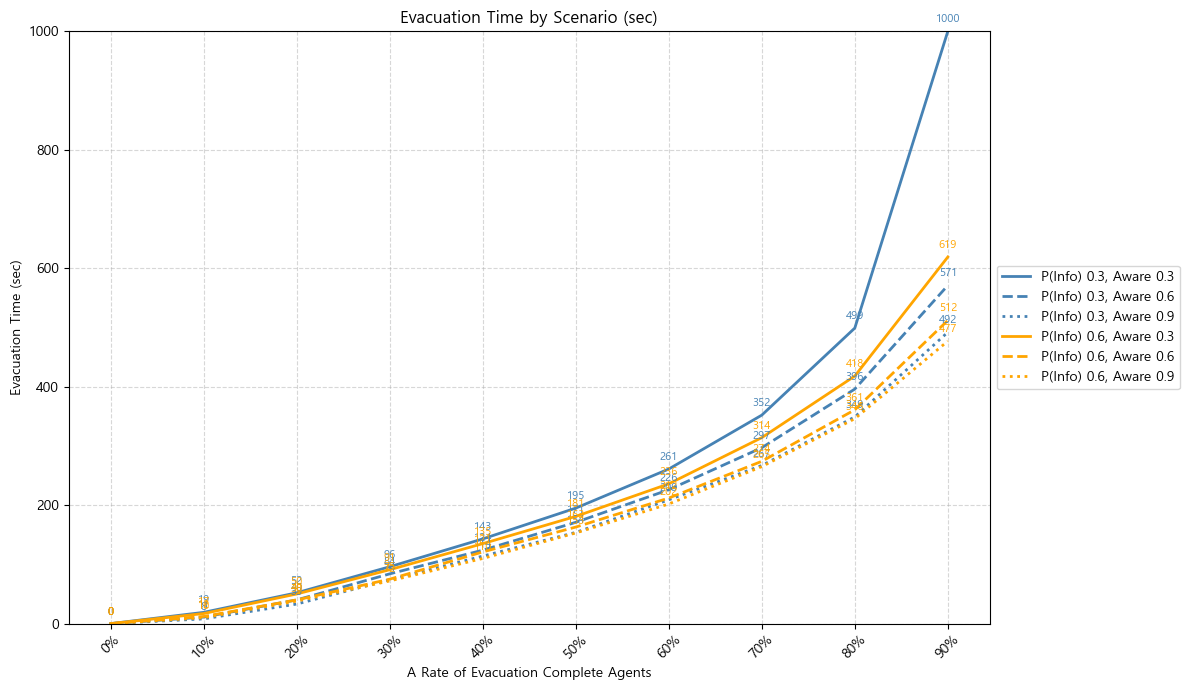

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ 퍼센트 구간: 10% 단위
percentiles = np.arange(0, 100, 10)
labels = [f"{p}%" for p in percentiles]

# ✅ 시나리오 조건
knowledge_levels = [0.3, 0.6, 0.9]     # 정보 전파확률
awareness_levels = [0.3, 0.6, 0.9]     # 인지 비율

# ✅ 색상과 선 스타일 맵
color_map = {0.3: 'steelblue', 0.6: 'orange', 0.9: 'green'}  # by 전파확률
style_map = {0.3: '-', 0.6: '--', 0.9: ':'}                 # by 인지비율

plt.figure(figsize=(12, 7))
plt.title("Evacuation Time by Scenario (sec)")
plt.xlabel("A Rate of Evacuation Complete Agents")
plt.ylabel("Evacuation Time (sec)")
plt.ylim(0, 1000)

# ✅ 전체 9개 시나리오
for k_prob in knowledge_levels:
    for a_prob in awareness_levels:
        scenario_df = final_df[
            (final_df["정보 전파확률"] == k_prob) &
            (final_df["대피소 인지비율"] == a_prob)
        ].copy()

        if scenario_df.empty:
            continue

        # ✅ 실패자 소요시간 2000으로 처리
        scenario_df["소요 시간 (수정)"] = scenario_df.apply(
            lambda row: row["소요 시간"] if row["goal_reached"] else 2000,
            axis=1
        )

        times = scenario_df["소요 시간 (수정)"].dropna().sort_values().values
        total = len(times)

        percentile_times = []
        for p in percentiles:
            rank = int((p / 100) * total)
            rank = min(rank, total - 1)
            val = times[rank]
            percentile_times.append(min(val, 1000))  # Y축 제한

        color = color_map[k_prob]
        linestyle = style_map[a_prob]
        label = f"P(Info) {k_prob}, Aware {a_prob}"
        
        # ✅ 선 그리기
        plt.plot(labels, percentile_times, label=label,
                 color=color, linestyle=linestyle, linewidth=2)

        # ✅ 값 라벨 표시
        for x, y in zip(labels, percentile_times):
            plt.text(x, y + 10, f"{int(y)}", ha='center', va='bottom',
                     fontsize=8, color=color)

# ✅ 마무리
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [48]:
from docx import Document
from docx.shared import Inches
import numpy as np
import os

# ✅ 저장 폴더 준비
os.makedirs("plots", exist_ok=True)
os.makedirs("summaries", exist_ok=True)

# ✅ Word 문서 생성
doc = Document()
doc.add_heading("보행자 유형별 인지비율에 따른 대피 성공률", level=1)

# ✅ 그래프 + 표 저장 반복
bin_width = 30
max_time = final_df["소요 시간"].max()
bins = np.arange(0, max_time + bin_width, bin_width)

for ped_type in pedestrian_types:
    plt.figure(figsize=(10, 6))
    plt.title(f"{ped_type} – 인지비율별 대피 성공률 비교")
    all_rates = []

    for know_prob in knowledge_levels:
        df = final_df[
            (final_df["대피소 인지비율"] == know_prob) &
            (final_df["보행자 타입"] == ped_type)
        ]
        total = len(df)
        if total == 0:
            continue
        successful = df[df["대피 성공 여부"] == True]
        times = successful["소요 시간"].dropna().sort_values()
        if len(times) == 0:
            continue
        cum_success_rate = [(i + 1) / total * 100 for i in range(len(times))]
        all_rates.extend(cum_success_rate)
        plt.plot(times.values, cum_success_rate,
                 label=f"인지비율 {know_prob}",
                 color=colors[know_prob],
                 linewidth=1.5,
                 alpha=0.8)

    plt.xlabel("소요 시간 (초)")
    plt.ylabel("대피 성공률 (%)")
    if all_rates:
        min_rate = max(min(all_rates) - 5, 0)
        max_rate = min(max(all_rates) + 5, 100)
        plt.ylim(min_rate, max_rate)
    else:
        plt.ylim(0, 100)
    plt.xlim(left=0)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

    # ✅ 그래프 저장
    ped_type_safe = ped_type.replace("/", "_")  # 슬래시를 언더스코어로 대체
    
    fig_path = f"plots/{ped_type_safe}_graph.png"
    plt.savefig(fig_path, dpi=300)
    plt.close()

    # ✅ Word 문서에 추가
    doc.add_heading(f"{ped_type} – 대피 성공률 그래프", level=2)
    doc.add_picture(fig_path, width=Inches(6.0))

    # ✅ 표 생성
    summary = {"구간 (초)": [f"{int(start)}~{int(start+bin_width)}" for start in bins[:-1]]}
    for know_prob in knowledge_levels:
        df = final_df[
            (final_df["대피소 인지비율"] == know_prob) &
            (final_df["보행자 타입"] == ped_type)
        ]
        total = len(df)
        if total == 0:
            summary[f"인지비율 {know_prob}"] = [0] * len(bins[:-1])
            continue
        success_times = df.loc[df["대피 성공 여부"] == True, "소요 시간"]
        success_times = success_times[pd.notnull(success_times)]
        counts, _ = np.histogram(success_times, bins=bins)
        cumulative = np.cumsum(counts)
        cumulative_rate = (cumulative / total) * 100
        summary[f"인지비율 {know_prob}"] = [round(val, 2) for val in cumulative_rate]

    summary_df = pd.DataFrame(summary)

    # ✅ 표를 Word 문서에 삽입
    doc.add_heading(f"{ped_type} – 누적 성공률 표", level=2)
    table = doc.add_table(rows=1, cols=len(summary_df.columns))
    table.style = 'Table Grid'
    hdr_cells = table.rows[0].cells
    for i, col in enumerate(summary_df.columns):
        hdr_cells[i].text = str(col)
    for _, row in summary_df.iterrows():
        row_cells = table.add_row().cells
        for i, item in enumerate(row):
            row_cells[i].text = str(item)

# ✅ 문서 저장
doc.save("summaries/대피_성공률_그래프_및_표.docx")
from docx import Document
from docx.shared import Inches
import os

# ✅ 저장 폴더 준비
os.makedirs("boxplots", exist_ok=True)
os.makedirs("summaries", exist_ok=True)

# ✅ Word 문서 생성
doc = Document()
doc.add_heading("보행자 유형별 Boxplot – 인지비율에 따른 대피 소요시간", level=1)

# ✅ 보행자 유형별 그래프 저장 및 문서 삽입
for ped_type in pedestrian_types:
    subset = success_df[success_df["보행자 타입"] == ped_type]

    if subset.empty:
        continue

    plt.figure(figsize=(8, 6))
    sns.boxplot(x="대피소 인지비율", y="소요 시간", data=subset, palette="Set2")

    group_means = subset.groupby("대피소 인지비율")["소요 시간"].mean()
    for i, xval in enumerate(sorted(group_means.index)):
        mean_time = round(group_means[xval], 1)
        plt.text(i, mean_time + 5, f"평균: {mean_time}", ha='center', color='black', fontsize=9)

    plt.title(f"{ped_type} – 인지비율별 대피 성공자의 소요 시간 분포")
    plt.xlabel("대피소 인지비율")
    plt.ylabel("소요 시간 (초)")
    plt.ylim(bottom=0)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # ✅ 그래프 저장
    ped_type_safe = ped_type.replace("/", "_")  # 슬래시를 언더스코어로 대체
    fig_path = f"plots/{ped_type_safe}_graph.png"
    plt.savefig(fig_path, dpi=300)
    plt.close()

    # ✅ Word 문서에 추가
    doc.add_heading(f"{ped_type}", level=2)
    doc.add_paragraph("인지비율에 따른 대피 성공자의 소요 시간 분포 (Boxplot)")
    doc.add_picture(fig_path, width=Inches(6.0))

# ✅ 문서 저장
doc.save("summaries/Boxplot_대피소요시간.docx")

NameError: name 'success_df' is not defined

C:\Users\doohu\AppData\Local\Temp\ipykernel_14552\1123278891.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="대피소 인지비율", y="최대 혼잡도", data=subset, palette="Set2")


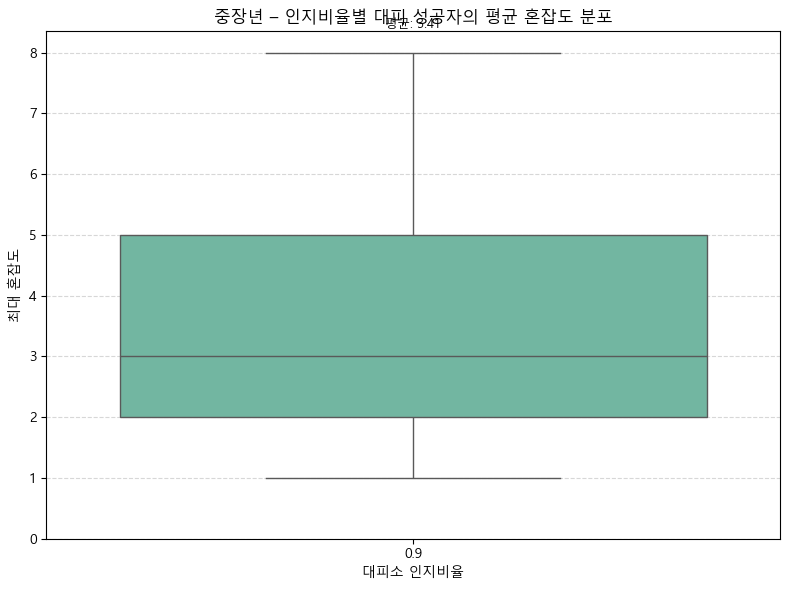

C:\Users\doohu\AppData\Local\Temp\ipykernel_14552\1123278891.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="대피소 인지비율", y="최대 혼잡도", data=subset, palette="Set2")


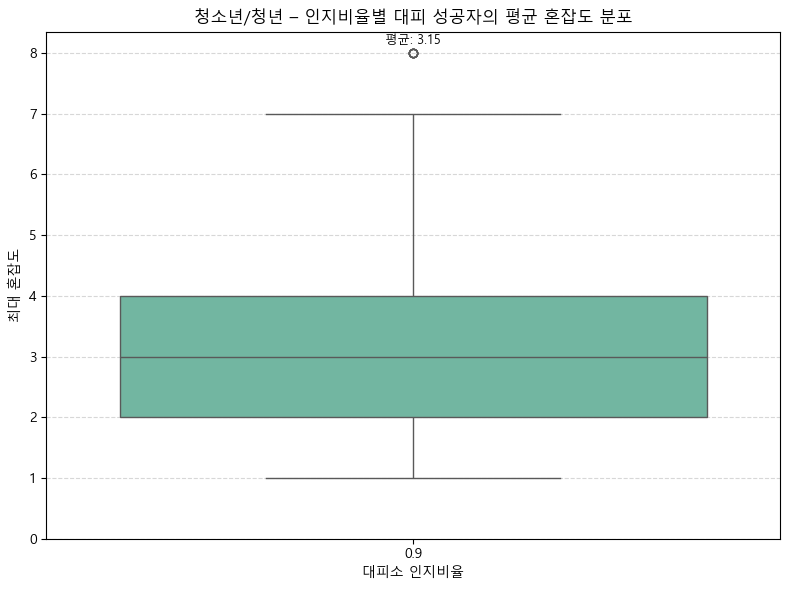

C:\Users\doohu\AppData\Local\Temp\ipykernel_14552\1123278891.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="대피소 인지비율", y="최대 혼잡도", data=subset, palette="Set2")


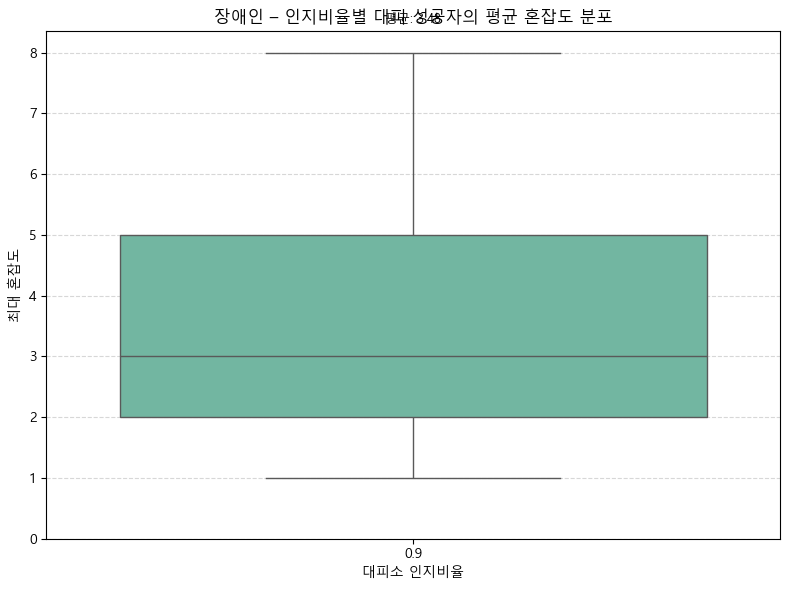

C:\Users\doohu\AppData\Local\Temp\ipykernel_14552\1123278891.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="대피소 인지비율", y="최대 혼잡도", data=subset, palette="Set2")


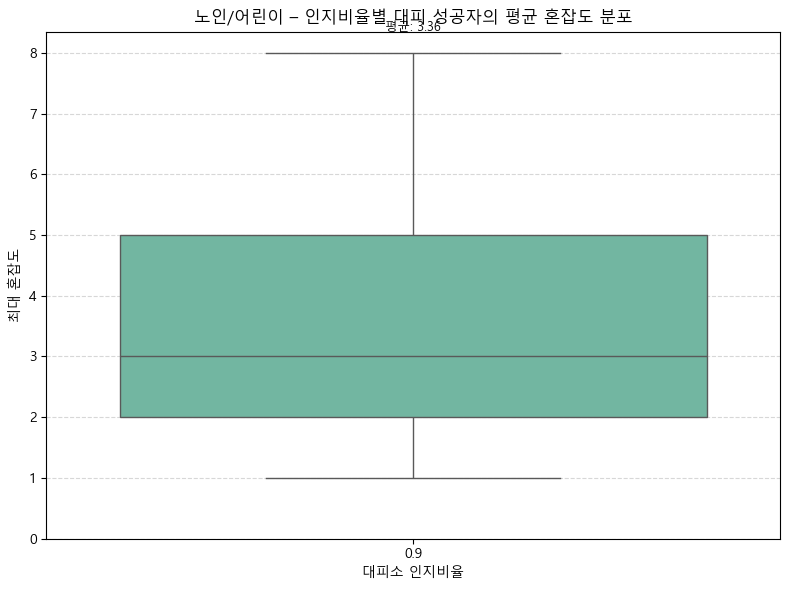

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 소요 시간 전처리
def extract_number(val):
    if isinstance(val, list):
        return val[0]
    elif isinstance(val, str) and val.startswith("[") and val.endswith("]"):
        try:
            return float(val.strip("[]"))
        except:
            return None
    else:
        return val

final_df["최대 혼잡도"] = final_df["최대 혼잡도"].apply(extract_number)
final_df = final_df.dropna(subset=["최대 혼잡도"])

# ✅ 대피 성공자만 필터링
success_df = final_df[final_df["대피 성공 여부"] == True].copy()

# ✅ 보행자 유형 목록
pedestrian_types = ["중장년", "청소년/청년", "장애인", "노인/어린이"]

# ✅ 보행자 유형별 그래프 분리 출력
for ped_type in pedestrian_types:
    subset = success_df[success_df["보행자 타입"] == ped_type]

    if subset.empty:
        continue

    plt.figure(figsize=(8, 6))
    sns.boxplot(x="대피소 인지비율", y="최대 혼잡도", data=subset, palette="Set2")

    # ✅ 평균값 표시
    group_means = subset.groupby("대피소 인지비율")["최대 혼잡도"].mean()
    for i, xval in enumerate(sorted(group_means.index)):
        mean_time = round(group_means[xval], 2)
        plt.text(i, mean_time + 5, f"평균: {mean_time}", ha='center', color='black', fontsize=9)

    plt.title(f"{ped_type} – 인지비율별 대피 성공자의 평균 혼잡도 분포")
    plt.xlabel("대피소 인지비율")
    plt.ylabel("최대 혼잡도")
    plt.ylim(bottom=0)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



C:\Users\doohu\AppData\Local\Temp\ipykernel_28616\2723779696.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="대피소 인지비율", y="소요 시간", data=subset, palette="Set2")


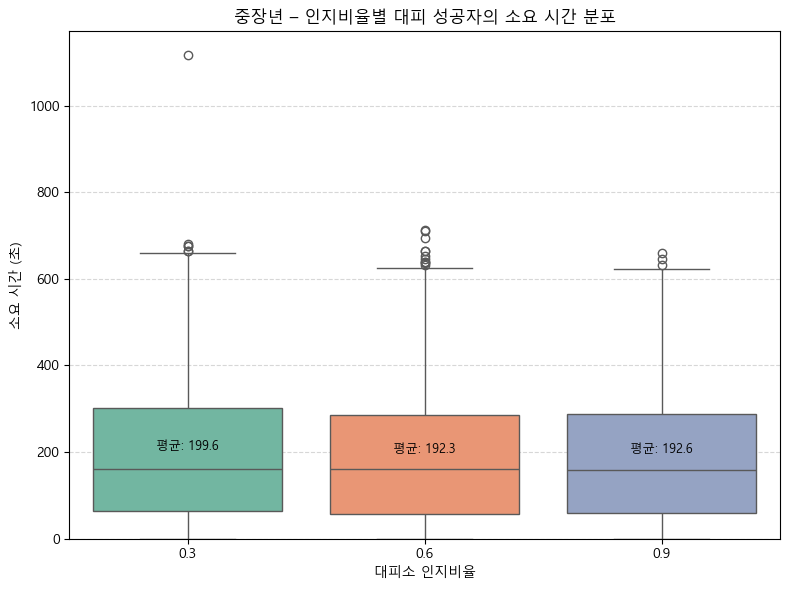

C:\Users\doohu\AppData\Local\Temp\ipykernel_28616\2723779696.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="대피소 인지비율", y="소요 시간", data=subset, palette="Set2")


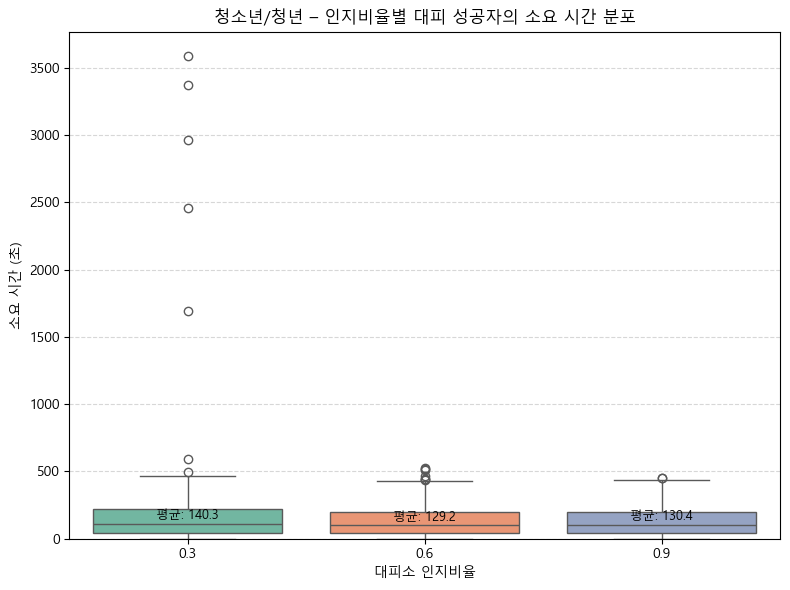

C:\Users\doohu\AppData\Local\Temp\ipykernel_28616\2723779696.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="대피소 인지비율", y="소요 시간", data=subset, palette="Set2")


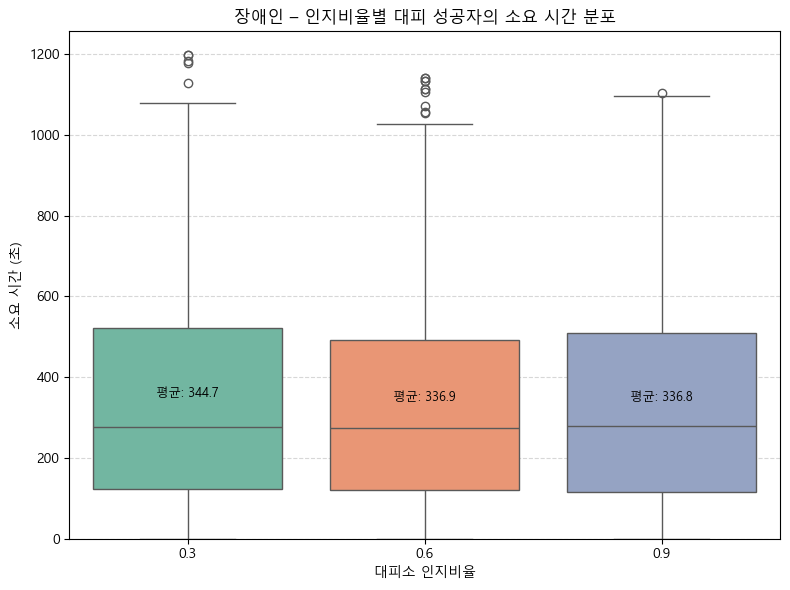

C:\Users\doohu\AppData\Local\Temp\ipykernel_28616\2723779696.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="대피소 인지비율", y="소요 시간", data=subset, palette="Set2")


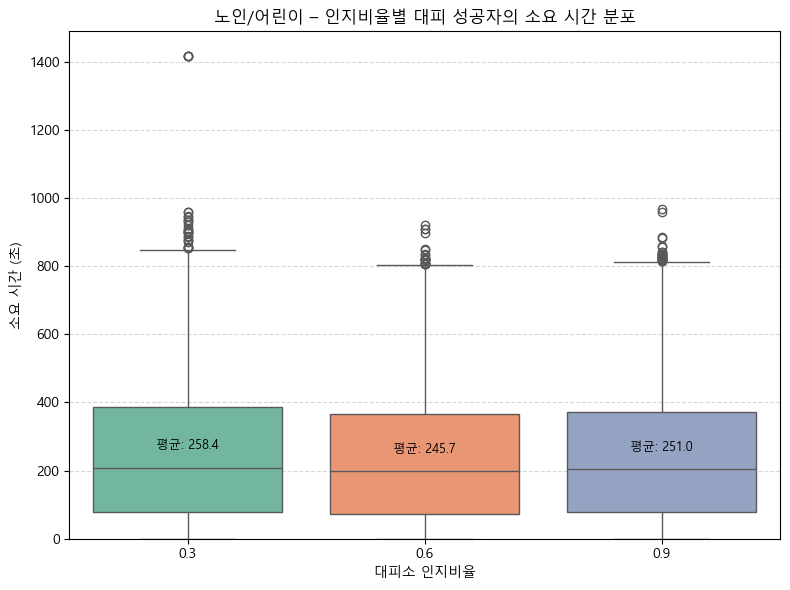

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 소요 시간 전처리
def extract_number(val):
    if isinstance(val, list):
        return val[0]
    elif isinstance(val, str) and val.startswith("[") and val.endswith("]"):
        try:
            return float(val.strip("[]"))
        except:
            return None
    else:
        return val

final_df["소요 시간"] = final_df["소요 시간"].apply(extract_number)
final_df = final_df.dropna(subset=["소요 시간"])

# ✅ 대피 성공자만 필터링
success_df = final_df[final_df["대피 성공 여부"] == True].copy()

# ✅ 보행자 유형 목록
pedestrian_types = ["중장년", "청소년/청년", "장애인", "노인/어린이"]

# ✅ 보행자 유형별 그래프 분리 출력
for ped_type in pedestrian_types:
    subset = success_df[success_df["보행자 타입"] == ped_type]

    if subset.empty:
        continue

    plt.figure(figsize=(8, 6))
    sns.boxplot(x="대피소 인지비율", y="소요 시간", data=subset, palette="Set2")

    # ✅ 평균값 표시
    group_means = subset.groupby("대피소 인지비율")["소요 시간"].mean()
    for i, xval in enumerate(sorted(group_means.index)):
        mean_time = round(group_means[xval], 1)
        plt.text(i, mean_time + 5, f"평균: {mean_time}", ha='center', color='black', fontsize=9)

    plt.title(f"{ped_type} – 인지비율별 대피 성공자의 소요 시간 분포")
    plt.xlabel("대피소 인지비율")
    plt.ylabel("소요 시간 (초)")
    plt.ylim(bottom=0)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
